##### Goal : To apply and implement protfolio theories with use of data analytics and visualization tools in Python

##### Description: 
- The Efficient Forntier and Sharpe Ratio are two important concepts in protfolio managament and optmization. 
- EF take into account of all possible combinations of assests and measure them against their combined risks and returns. 
- It is suggested that the optimal profolio lies on the efficeint frontier curve (the parabola curve).
- Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. 
-        Sharpe Ratio = (R(p) - R(f))/ s 
        
        where  
               R(p) = Return of Profolio
               R(f) = Risk-free Rate
               s    = Volatility(measured in standard deviation) of profolio 

- Limitaitons of Modern Profolio Theory : 
            
          - Assest Returns: not normal distribution in real world
          - Information Aysmmetry

- The Sharpe ratio adjusts a portfolio’s past performance — or expected future performance— for the excess risk that was taken by the investor. It can also help explain whether the excess returns are due to smart investment decisions or a result of too much risk. A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns.

##### Resources Used:
- Machine Leanring for Trading, Udacity Online Course
- Python for Finance (Book, O'Reiley Publication) 

In [0]:
%matplotlib inline

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

In [0]:
quandl.ApiConfig.api_key = 'mc71ezue12JjfuVzyS1u'

# List of Stocks from Blue Blazers (as of May, 2018)
stocks = ['AAPL','AAXN','ACCO','ATVI','BA','BABA','BAM','CAT','CENX','CGNX','DEO','DIS',
          'DVN','EBAY','ENB','FISV','FNCL','GE','GILD','GLW','GOOGL','HAL','HAS','HI','HOLX',
         'INTC','IXG','MCD','MDT','MSFT','NVDA','PAC','PEP','PFE','PG','PYPL','QCOM','RTN',
         'SBUX','SQ','STZ','T','TDG','TSLA','TTM','WFC','WM','WPM','ZTS']
data = quandl.get_table('WIKI/PRICES', ticker = stocks)
data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\quandl\get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,ZTS,2018-03-27,84.08,84.45,81.21,81.86,2676191.0,0.0,1.0,84.08,84.45,81.21,81.86,2676191.0
1,ZTS,2018-03-26,81.88,83.87,81.53,83.73,3084185.0,0.0,1.0,81.88,83.87,81.53,83.73,3084185.0
2,ZTS,2018-03-23,82.16,82.80,80.32,80.60,2590726.0,0.0,1.0,82.16,82.80,80.32,80.60,2590726.0
3,ZTS,2018-03-22,83.35,84.13,81.80,82.06,3203633.0,0.0,1.0,83.35,84.13,81.80,82.06,3203633.0
4,ZTS,2018-03-21,84.87,85.73,84.07,84.10,3193284.0,0.0,1.0,84.87,85.73,84.07,84.10,3193284.0


In [0]:
data = quandl.get_table('WIKI/PRICES', ticker = stocks,  qopts = { 'columns': ['date', 'ticker', 'adj_close'] }, date = { 'gte': '2015-1-1', 'lte': '2018-11-30' }, paginate=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30754 entries, 0 to 30753
Data columns (total 3 columns):
date         30754 non-null datetime64[ns]
ticker       30754 non-null object
adj_close    30754 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 720.9+ KB


In [0]:
df = data.set_index('date')
table = df.pivot(columns='ticker')

table.columns = [col[1] for col in table.columns]
table.tail()

,AAPL,ACCO,ATVI,BA,CAT,CENX,CGNX,DIS,DVN,EBAY,...,QCOM,RTN,SBUX,STZ,T,TDG,TSLA,WFC,WM,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2018-03-21,171.270,12.80,71.61,337.10,155.80,20.400,55.760,101.82,32.92,41.67,...,56.81,213.48,58.47,226.07,36.00,309.34,316.53,54.79,85.92,84.10
2018-03-22,168.845,12.45,69.76,319.61,146.90,16.760,54.105,100.60,32.29,40.58,...,55.58,209.11,57.77,224.23,35.37,302.73,309.10,52.53,84.24,82.06
2018-03-23,164.940,12.10,68.04,321.00,144.29,16.665,52.750,98.54,32.23,39.71,...,53.66,214.57,56.31,220.92,34.70,302.80,301.54,50.98,82.90,80.60
2018-03-26,172.770,12.45,70.08,328.97,149.19,17.305,54.050,100.65,32.47,41.01,...,56.13,218.73,57.80,220.35,34.69,309.39,304.18,52.29,84.13,83.73
2018-03-27,168.340,12.20,66.29,321.12,146.99,16.220,53.330,99.36,31.71,40.22,...,54.84,215.11,57.46,218.47,34.90,305.14,279.18,51.10,83.29,81.86


Text(0,0.5,'daily returns')

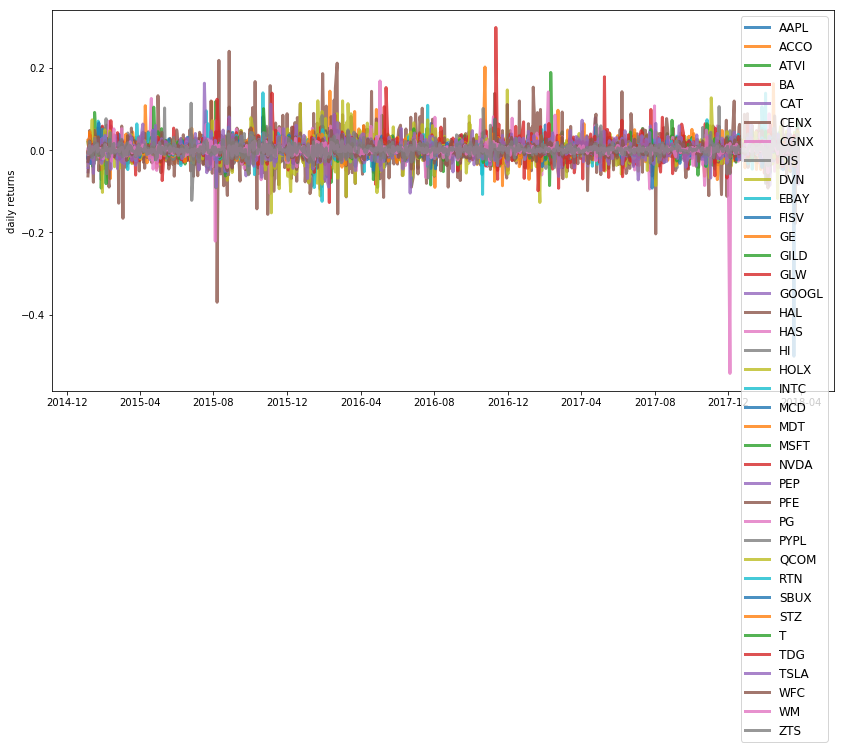

In [0]:
## Plotting Daily Returns (% change compared to the day before)
## By plotting daily returns, we can see the stocks’ volatility. The higher the spike, the higher the risks 

returns = table.pct_change()

plt.figure(figsize=(14, 7))

for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [0]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 1000
risk_free_rate = 0.0178 #U.S Treasury bill rate at the start of 2018

In [0]:
# “portfolio_annualised_performance” function will calculate the returns and volatility
#            252 = Number of Trading Days Per Year 
#            std = std deviation of wighted 
# “random_portfolios” function will generate portfolios with random weights assigned to each stock, 
#            num_portfolios = how many random portfolios you want to generate.


def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for  i in range( num_portfolios):
        weights = np.random.random(38)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [0]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='^',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='^',color='b',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.14


            AAPL  ACCO  ATVI   BA   CAT  CENX  CGNX   DIS   DVN  EBAY  ...   \
allocation  1.65  4.55  4.49  5.2  1.38  3.68  0.39  4.54  0.54  2.11  ...    

            QCOM   RTN  SBUX   STZ     T   TDG  TSLA  WFC    WM   ZTS  
allocation  3.27  4.96  2.08  4.51  4.39  1.32  0.23  2.1  3.15  1.32  

[1 rows x 38 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.15
Annualised Volatility: 0.13


            AAPL  ACCO  ATVI    BA  CAT  CENX  CGNX   DIS  DVN  EBAY  ...   \
allocation  3.33  0.41  3.69  1.16  5.6  1.23  0.16  4.85  1.6  1.37  ...    

            QCOM   RTN  SBUX   STZ     T   TDG  TSLA   WFC    WM   ZTS  
allocation  2.09  4.63  4.87  5.17  3.86  3.15  0.18  1.61  3.18  0.88  

[1 rows x 38 colu

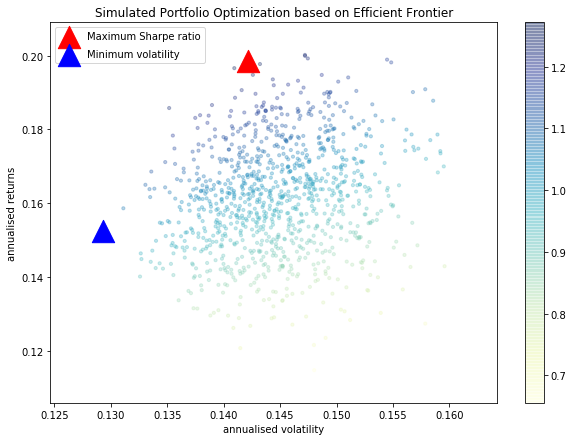

In [0]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [0]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# The same Formula : But we want to set the value of protfolio as 1 
#(which means you cannot allocate more than 100% of your budget)


def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    # scipy optimize functin will elminate the assest with high risks 
    return result

In [0]:

def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

   
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)

    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='^',color='r',s=500, label='Maximum Sharpe ratio')

    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
    


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.44
Annualised Volatility: 0.18


            AAPL  ACCO  ATVI     BA  CAT  CENX  CGNX  DIS  DVN  EBAY ...   \
allocation   0.0   0.0   8.0  15.57  0.0   0.0   0.0  0.0  0.0   0.0 ...    

            QCOM    RTN  SBUX    STZ    T  TDG  TSLA  WFC    WM  ZTS  
allocation   0.0  19.51   0.0  19.64  0.0  0.0   0.0  0.0  0.81  0.0  

[1 rows x 38 columns]
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AAPL : annuaised return 0.18 , annualised volatility: 0.23
ACCO : annuaised return 0.17 , annualised volatility: 0.37
ATVI : annuaised return 0.42 , annualised volatility: 0.3
BA : annuaised return 0.33 , annualised volatility: 0.23
CAT : annuaised return 0.21 , annualised volatility: 0.25
CENX : annuaised return 0.18 , annualised volatility: 0.78
CGNX : annuaised return 0.22 ,

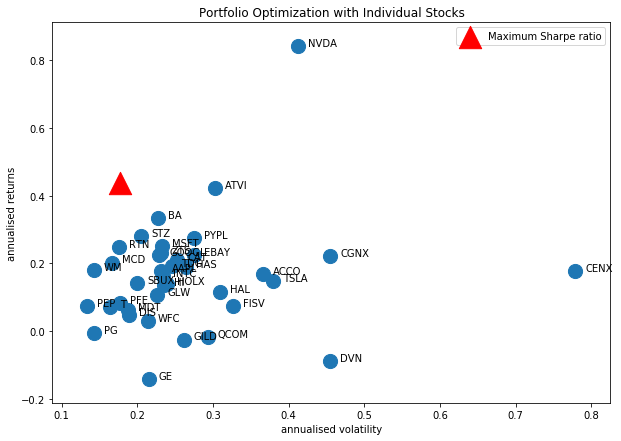

In [0]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)